In [15]:
import networkx as nx
import matplotlib.pyplot as plt
import random

# Part 1

### a)

In [16]:
G = nx.powerlaw_cluster_graph(300, 3, 0.8, seed=25)

In [17]:
# number of nodes
N = nx.number_of_nodes(G)
print("Number of nodes: ", N)

# number of links
print("Number of edges: ", nx.number_of_edges(G))

# average degree
print("Average degree: ", sum([d for n, d in G.degree()])/nx.number_of_nodes(G))

# Density
print("Density: ", nx.density(G))

# Global clustering
print("Global clustering: ", nx.transitivity(G))

# Average clustering
print("Average clustering: ", nx.average_clustering(G))

Number of nodes:  300
Number of edges:  891
Average degree:  5.94
Density:  0.019866220735785953
Global clustering:  0.13350300786672836
Average clustering:  0.48226702908282787


In [18]:
if not nx.is_connected(G):
    print("graph not connected! From now on the largest component will be considered as the graph")  
    G =  G.subgraph(sorted(nx.connected_components(G), key=len, reverse=True)[0]).copy()
    
print("Number of nodes of the giant component: ", nx.number_of_nodes(G))

Number of nodes of the giant component:  300


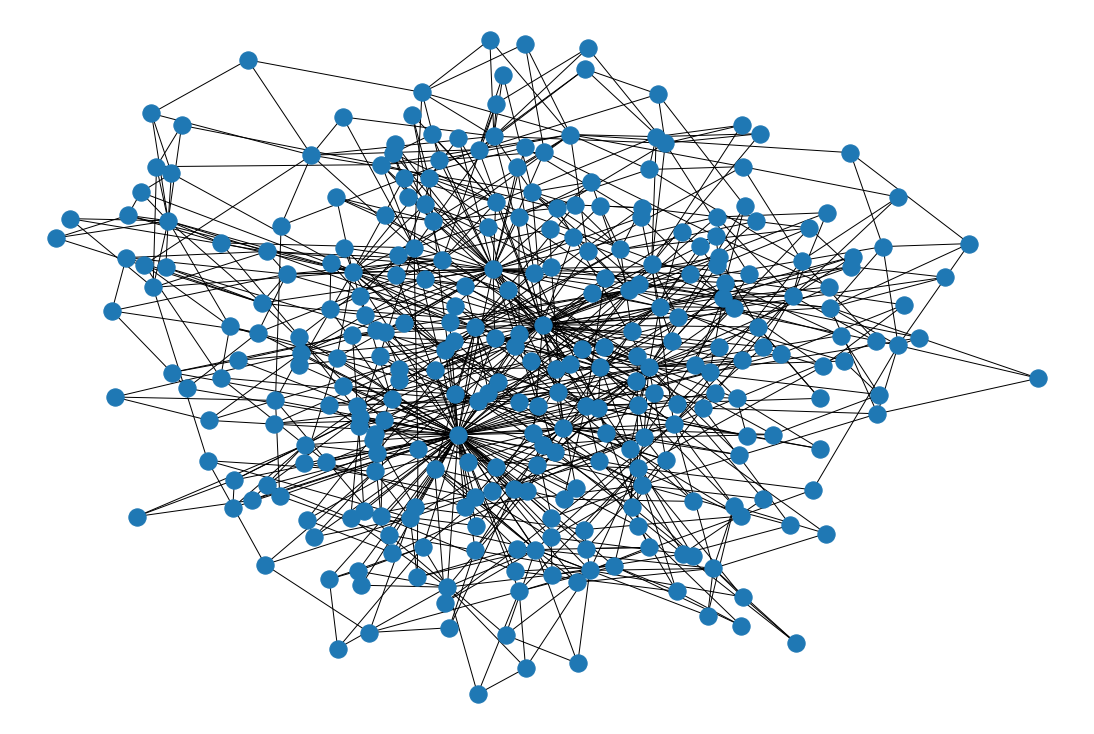

In [19]:
plt.figure( figsize=(15, 10))
nx.draw(G)
plt.show()

### b)

#### Attack-1: Remove node with the highest betweeness

In [20]:
#find node with highest betweenness

betweenness_dict = nx.betweenness_centrality(G)
max_betweenness_node = max(betweenness_dict, key=betweenness_dict.get)  # Just use 'min' instead of 'max' for minimum.
print("Node: ", max_betweenness_node, "- Betweenness Value: ", betweenness_dict[max_betweenness_node])

##Remove nodes with highest betweenness
G.remove_node(max_betweenness_node)


Node:  1 - Betweenness Value:  0.4454940542574431


#### Attack-2: Remove node with the highest degree

In [21]:
# degree of the nodes
degree_dict = dict(G.degree)
# node with highest degree
max_node_degree = max( degree_dict, key=degree_dict.get)
print("Node: ", max_node_degree, "- Betweenness Value: ", degree_dict[max_node_degree])

#remove node with highest degree
G.remove_node(max_node_degree)

Node:  8 - Betweenness Value:  56


#### Attack-3: Remove a node at random

In [22]:
#pick random node
random_node = random.randint(0, nx.number_of_nodes(G)-1)
print("Node: ", random_node)

#remove random node
G.remove_node(random_node)

Node:  107


#### Attack-4: Remove node with the highest pagerank

In [23]:
# computing page rank
pageRank_dict = nx.pagerank(G)

#pick the node di maximun pagerank
max_pageRank_idx = max(pageRank_dict, key=pageRank_dict.get)  # Just use 'min' instead of 'max' for minimum.
print("Node: ", max_pageRank_idx, "- Pagerank Value: ", pageRank_dict[max_pageRank_idx])

#remove the node with highest pagerank
G.remove_node(max_pageRank_idx)

Node:  3 - Pagerank Value:  0.026881028925818572


### c)

In [24]:
if not nx.is_connected(G):
    print("graph not connected! From now on the largest component will be considered as the graph")  
    G =  G.subgraph(sorted(nx.connected_components(G), key=len, reverse=True)[0]).copy()
    
print("Number of nodes of the giant component: ", nx.number_of_nodes(G))

Number of nodes of the giant component:  296


### d)

# Part 2